Importing The Dependencies


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [3]:
#loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/Users/aryanagrawal/carPrice_Prediction/CAR DETAILS FROM CAR DEKHO.csv')
 

In [4]:
#to get 5 rows of the dataset
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
#to check no of rows and column
car_dataset.shape

(4340, 8)

In [6]:
#information on dataset
car_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
#checking missing values
car_dataset.isnull().sum()


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [12]:
#checking distribution
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())


fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


Encoding

In [23]:
#Fuel type
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)

#seller type
car_dataset.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}},inplace=True)

#transmission
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

#owner
car_dataset.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)


In [24]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,1,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,1,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,1


Splitting the Data and Target


In [25]:
X=car_dataset.drop(['name','selling_price'],axis=1)
Y=car_dataset['selling_price']

In [26]:
X.head()

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,0,1,0,0
1,2007,50000,0,1,0,0
2,2012,100000,1,1,0,0
3,2017,46000,0,1,0,0
4,2014,141000,1,1,0,1


In [27]:
Y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

Splitting Training and Test Data

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.5,random_state=295)



Model Training
    1. Linear Regression

In [67]:
lin_reg_model=LinearRegression()

In [68]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [69]:
#prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [70]:
#R squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print(error_score)

0.46149392355109586


Visualize the actual and predicted prices

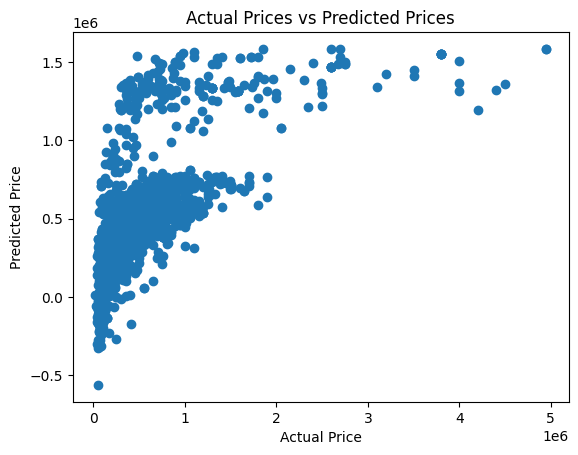

In [71]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Working on Test Data

In [72]:
#prediction on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [73]:
#R squared Error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print(error_score)

0.412698988994885


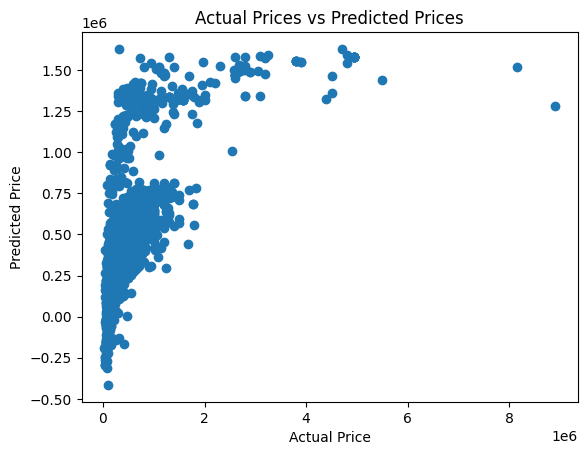

In [74]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Lasso Regression

In [75]:
lass_reg_model=Lasso()

In [76]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [77]:
#prediction on training data
training_data_prediction = lass_reg_model.predict(X_train)

In [78]:
#R squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print(error_score)

0.4614939234808303


Visualize the actual and predicted prices

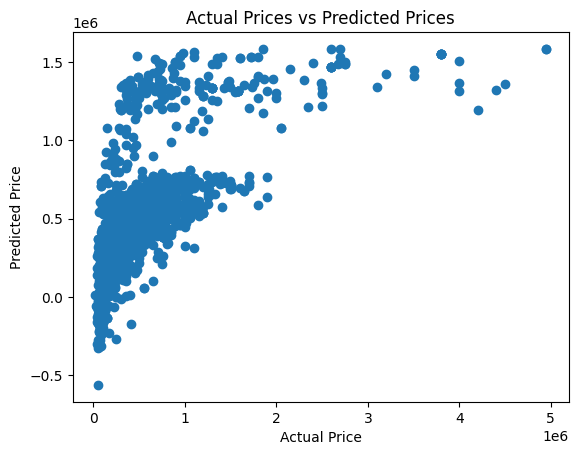

In [79]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Working on Test Data

In [80]:
#prediction on test data
test_data_prediction = lass_reg_model.predict(X_test)

In [81]:
#R squared Error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print(error_score)

0.41269771356700735


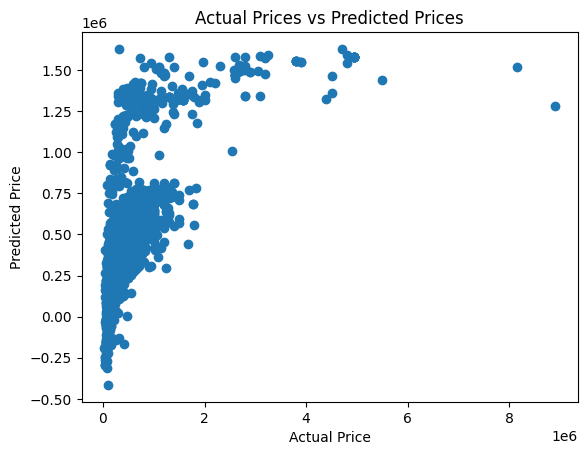

In [82]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()